In [1]:
import numpy as np
import rasterio
import rasterio.plot
import matplotlib as mpl
import matplotlib.pyplot as plt

from affine import Affine

%matplotlib inline

In [2]:
import popfill.loader

In [3]:
mask_file = "data/mask_clip_simple.tif"
population_file = "data/pop_clip_simple.tif"

In [13]:
loader = popfill.loader.PopulationLoader()
mask, population = loader.load(mask_file, population_file)

In [19]:
a = ~np.isnan(population.data)
print(pop_re[a])

TypeError: only integer scalar arrays can be converted to a scalar index

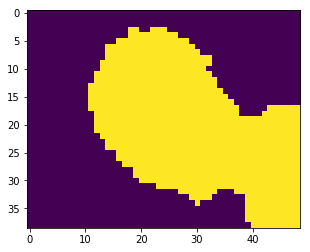

In [21]:
pop_re = population.data.astype(np.int)
pop_re[~np.isnan(population.data)] = 20;
pop_re[np.isnan(population.data)] = 10;
pop_re = pop_re.astype(np.int)

plt.imshow(pop_re)

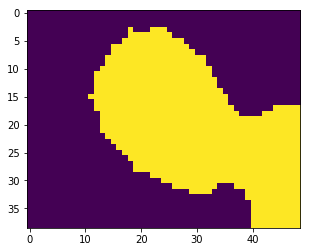

In [20]:
mask_re = mask.data.astype(np.int)
mask_re[mask.data==1] = 2;
mask_re[mask.data==0] = 1;

plt.imshow(mask_re)

In [22]:
class_re = pop_re + mask_re

In [5]:
T0 = mask.profile['transform']
T1 = T0*Affine.translation(0.5, 0.5) # Get affine transform for pixel centers

# Function to convert pixel row/column index (from 0) to easting/northing at center
rc2xy = lambda r, c: (c, r) * T1

In [23]:
col = np.arange(mask_re.shape[1])
row = np.arange(mask_re.shape[0])
cols, rows = np.meshgrid(col, row)

x, y = rc2xy(rows, cols)

Text(0.5,0,'Longitude')

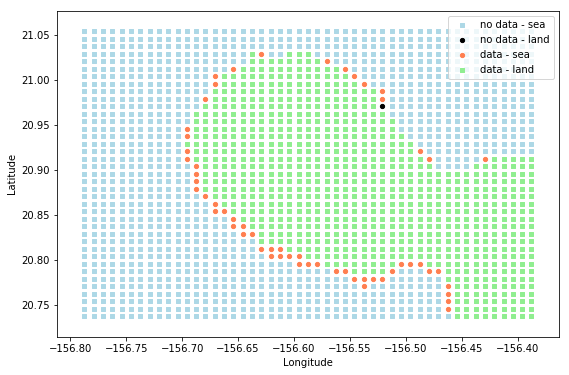

In [24]:
plt.figure(figsize=(9,6))
h1 = plt.scatter(x[class_re==11], y[class_re==11], 18, c = 'lightblue', marker = u's')
h2 = plt.scatter(x[class_re==12], y[class_re==12], 18, c = 'black', marker = u'o')
h3 = plt.scatter(x[class_re==21], y[class_re==21], 18, c = 'coral', marker = u'o')
h4 = plt.scatter(x[class_re==22], y[class_re==22], 18, c = 'lightgreen', marker = u's')

plt.legend((h1,h2,h3,h4),('no data - sea','no data - land','data - sea','data - land'))
plt.ylabel('Latitude')
plt.xlabel('Longitude')

In [25]:
unique, counts = np.unique(class_re, return_counts=True)

([<matplotlib.axis.XTick at 0x1192f3748>,
 <a list of 4 Text xticklabel objects>)

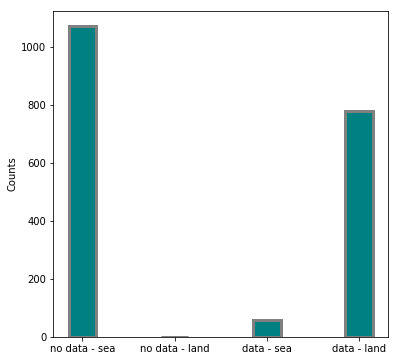

In [35]:
# bar plot to show the counts of different pixel interactions
plt.figure(figsize=(6,6))

plt.ylabel('Counts')
plt.bar(np.arange(4),counts,.3,align='center',color='teal',edgecolor='grey',linewidth=3)
plt.xticks(np.arange(4), ('no data - sea','no data - land','data - sea','data - land'))
